In [19]:
from sklearn import linear_model
from sklearn.datasets import load_iris
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the data
iris = load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

In [41]:
# Grab data
iris_data = DataFrame(X,columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# Grab Target
iris_target = DataFrame(Y,columns=['Species'])

# Create a combined Iris DataSet
iris = pd.concat([iris_data,iris_target],axis=1

In [46]:
data = iris[iris.Species==2][['Sepal Length', 'Petal Length']]
data.columns = ['x1', 'x2']

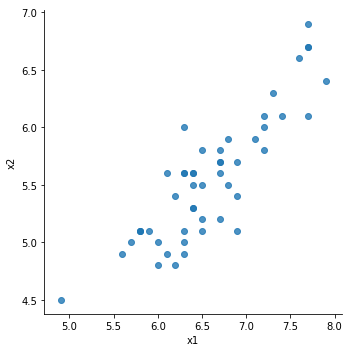

In [47]:
sns.lmplot('x1', 'x2', data=data, fit_reg=False)

数据分布在一个2维的平面上，我们也可以理解成当前数据由2个成分（2维数据有2个方向）组成，那么如果我们想变成1个成分我们应该怎么做呢？
直观的说，平面中有n(50)个点，我们希望找到1条直线，使得这n个点在该直线的方向上的分散程度取得最大，

为了找到这个成分（我们需要把问题转化成一个数学问题）。2维线性空间中有n个点，我们希望找到一个向量x（如下图），
## x具有使n个点在x方向上的距离的方差最大的性质

这样，原问题就变成了一个数学问题了

有朋友可能会问，为什么选距离的方差最大，而不是选择距离的绝对值最大呢？[**因为向量的方差是一个二次型，对二次型函数求最优值是比较容易的**](https://link.zhihu.com/?target=https%3A//www.matongxue.com/madocs/271.html).

简单的说，$二次型函数\leftrightarrow二次型矩阵\leftrightarrow对称矩阵$，而对称矩阵是可以正交对角化出特征值和特征向量的。**我们只需要判断出特征值的正负性，就可以对2次型函数的正负性进行判断了。**

简短证明如下：
对于$f(x_1, x_2, x_3, ..., x_n) = a_{11}x_1^2 + a_{22}x_2^2 + ... + a_{nn}x_n^2 + 2a_{12}x_1x_2 + 2a_{13}x_1x_3 + ... + 2a_{n-1, n}x_{n-1}x_n$

可以表述为线性代数的记法
$\left(\begin{array} {ccc} x_1\\ x_2\\ x_3\\ ...\\ x_n\\ \end{array} \right)^T$ $\left( \begin{array} {ccc} a_{11} & a_{12} & ... & a_{1n}\\ a_{21}\\ a_{31}\\ ...\\ a_{n1} & a_{n2} & ... & a_{nn}\\ \end{array} \right)$ $\left(\begin{array} {ccc} x_1\\ x_2\\ x_3\\ ...\\ x_n\\ \end{array} \right)$

**为什么要用线性代数的记法呢？**

因为使用线性代数的记法后，就可以使用线性代数的性质，另一方面高维的线性运算可以记作向量和线性算子之间的运算，也方便我们理解

记$A=\left( \begin{array} {ccc} a_{11} & a_{12} & ... & a_{1n}\\ a_{21}\\ a_{31}\\ ...\\ a_{n1} & a_{n2} & ... & a_{nn}\\ \end{array} \right)$, 
$x = \left(\begin{array} {ccc} x_1\\ x_2\\ x_3\\ ...\\ x_n\\ \end{array} \right)$, 则**$f(x_1, x_2, x_3, ..., x_n) = x^TAx$**

$其中A是一个对称矩阵，对称矩阵可以正交对角化分解$
我们记 $ A = yDy^T, 其中y是特征向量组成的正交矩阵，D是由特征值按从大到小排列的对角矩阵$

记$z=y^TX$，这样$f(x_1, x_2, x_3, ..., x_n) = x^TAx=x^TyDy^Tx=z^TDz=\sum_{i=1}^n d_{ii}z_i^2$, 如果D的对角元素$d_{ii}>=0，则f(x_1, x_2, x_3, ..., x_n)>=0$, 这时我们称A为半正定矩阵，半正定矩阵是存在最大值的（准确的定义是$\forall 向量z, z^TAz >=0$, 可以这么理解，平方项的系数都大于等于0，那么和一定是大于等于0的)

### 优化的工具讲完了，现在回到正题

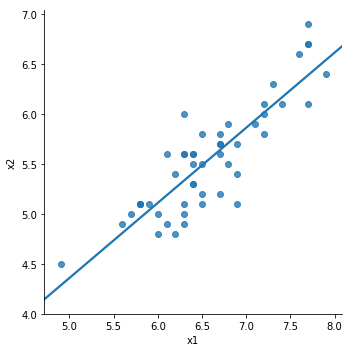

In [48]:
sns.lmplot('x1', 'x2', data=data, ci=0)

因为是求方差，所以我们可以把数据进行**归一化处理**（归一化处理会简化运算，而不会改变方差的值）

In [50]:
x1_mean, x2_mean = data.x1.mean(), data.x2.mean()
data.x1 = data.x1 - x1_mean
data.x2 = data.x2 - x2_mean

Text(-0.3,0.5,'x')

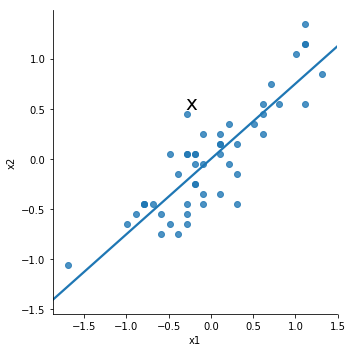

In [60]:
sns.lmplot('x1', 'x2', data=data, ci=0)
plt.text(-0.3, 0.5, 'x', size=20)

设上图中某点$x$在当前坐标系中的坐标($x_1, x_2$)。直线的单位向量为$\mu$, 空间中的点到该点的正交投影就是该点在u向量上的长度。
正交投影就是$u \cdot x$，又可以写成$u^Tx$，方差就是$(u^Tx)^2$, 由于$(u^Tx)^2 = (u^Tx)(u^Tx) = (u^Tx)(u^Tx)^T = u^Txx^Tu$

记$x = \left(\begin{array} {ccc} x_1\\ x_2\\ x_3\\ ...\\ x_n\\ \end{array} \right)$,     $x^T = \left(\begin{array} {ccc} x_1^T & x_2^T &  x_3^T & ... & x_n^T \end{array} \right)$


对于上图中的所有的n个点，方差之和$\sum_{i=1}^n u^Tx_ix_i^Tu = u^T\sum_{i=1}^nx_ix_i^Tu = u^Txx^Tu$，我们现在的目标就是求**$u^Txx^Tu$的最大值**。问题变成了数学优化问题。
优化一个2次型，也就是求导为0向量就好了。


## 我们重新在直觉上认识一下我们要干什么
在当前向量空间中，我们已知n个向量x，想找到一个新的单位向量u，使得这n个向量在u上的投影的方差最大。
从数学的角度来说，已知$向量{x_1, x_2, ...., x_n}, 求单位向量u，使 max \space u^Txx^Tu$

### 首先，我们先确定$u^Txx^Tu$存在最大值

注意到$xx^T$是对称矩阵(因为$(xx^T)^T=xx^T$)，对$xx^T做特征分解$，$\exists  特征向量p\neq o 和实数特征值\lambda$，使得
$xx^Tp = \lambda p$, 为了求$\lambda$, 我们可以尝试把向量变成距离(向量变为标量)

2边同乘$p^T$, $p^Txx^Tp = p^T \lambda p  \longrightarrow (x^Tp)^Tx^Tp = \lambda p^T p  \longrightarrow \|x^Tp\|^2 = \lambda \|p\|^2 \longrightarrow \lambda = \frac{\|x^Tp\|^2}{\|p\|^2} \geq 0$

特征值$\lambda$都大于等于0，因此$x^Tx$是一个半正定矩阵，依前面讨论，$u^Tx^Txu$存在最大值

### 既然存在最大值，我们就可以求取了

先把优化问题表述成一个数学优化问题

\begin{equation}  
\left\{  
             \begin{array}{**lr**}  
             arg \space max_u \space u^Tx^Txu  \\ 
             (意思是求参数u，使当前函数值最大) \\
             s.t. \space u^Tu = 1  & (s.t. 是受限于的意思)
             \end{array}  
\right.  
\end{equation} 

构筑lagrange函数，$\mathcal{L(u)} = u^Tx^Txu + \lambda(u^Tu - 1)$

求解
\begin{equation} 
\frac{\partial \mathcal{L}}{\partial u} = 0
\end{equation} 

矩阵求导可以查看[wikepedia](https://en.wikipedia.org/wiki/Matrix_calculus)对应的公式

$(x^Tx + (x^Tx)^T)u + 2\lambda u = 2(x^Tx + \lambda)u = 0 \longrightarrow x^Txu = -\lambda u$, 因此$\lambda$是$x^Tx$的特征值，u是$x^Tx$的特征向量。

等式左右2边同时乘以$u^T$

$u^Tx^Txu = -u^T\lambda u \longrightarrow u^Tx^Txu = -\lambda u^Tu$

这就是说求$u^Tx^Txu$的最大值，我们应该选使特征值$\lambda$最小的那个特征向量$u$。

为了验证结果的正确性，求解（矩阵求导中我们统一采用了分母表示法）
\begin{equation} 
\frac{\partial^2 \mathcal{L}}{\partial u} = 2((x^Tx)^T + \lambda I) = 2(x^Tx + \lambda I)
\end{equation} 

当$\lambda$取最小值时，$2(x^Tx + \lambda I)$是一个半负定矩阵，也就是说函数关于u的一阶导数是一个递减函数。因此一阶导数取0时，也就是取$\lambda$的最小值时，目标函数$u^Tx^Txu$有极大值。